# Import Libraries & Dataset

In [35]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import warnings

warnings.filterwarnings("ignore")

In [36]:
train = pd.read_csv("/kaggle/input/datasets/altruistdelhite04/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("/kaggle/input/datasets/altruistdelhite04/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv")

# EDA

In [37]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [39]:
train.drop("Loan_ID",inplace=True,axis=1)

In [40]:
test.drop("Loan_ID",inplace=True,axis=1)

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [43]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [44]:
test.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [45]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [47]:
train.shape

(614, 12)

In [48]:
test.shape

(367, 11)

In [49]:
numerical_train = train.select_dtypes(include=["int64","float64"]).columns
categorical_train = train.select_dtypes(include=["object"]).columns
numerical_test = test.select_dtypes(include=["int64","float64"]).columns
categorical_test = test.select_dtypes(include=["object"]).columns

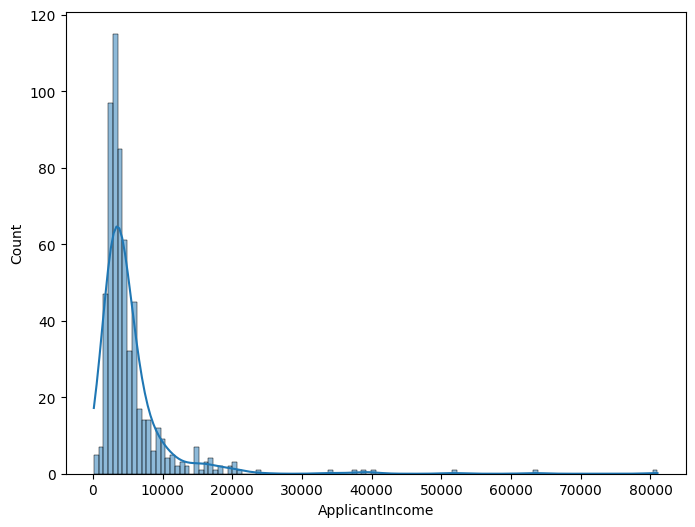

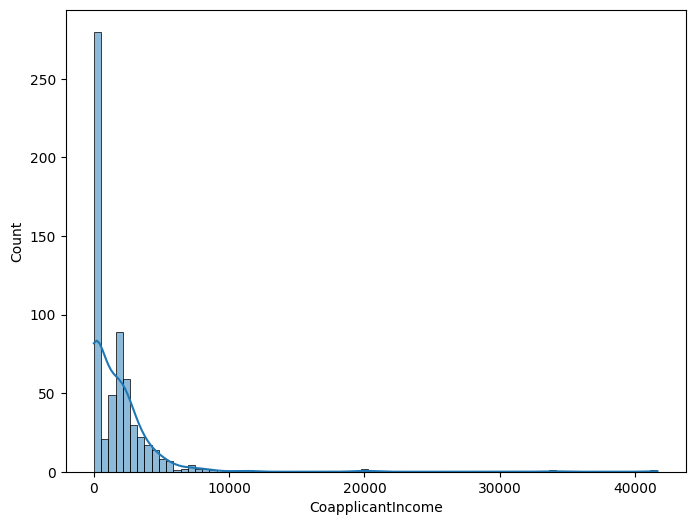

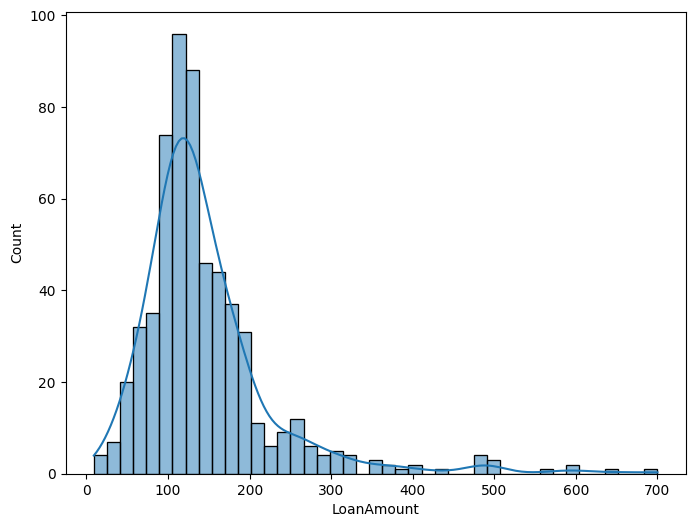

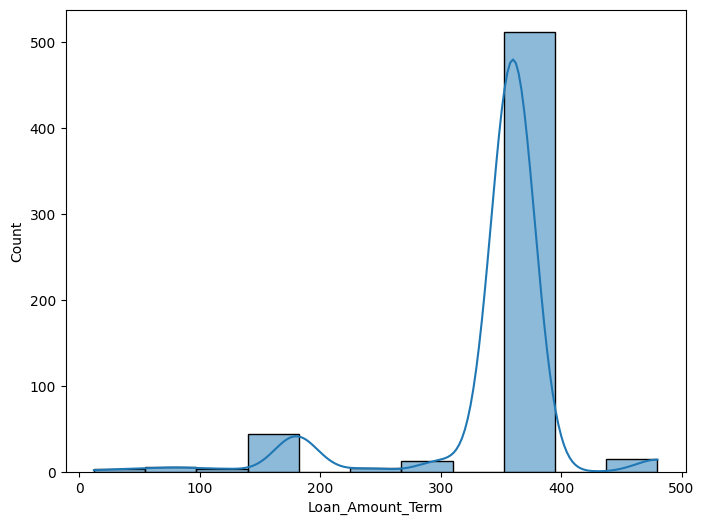

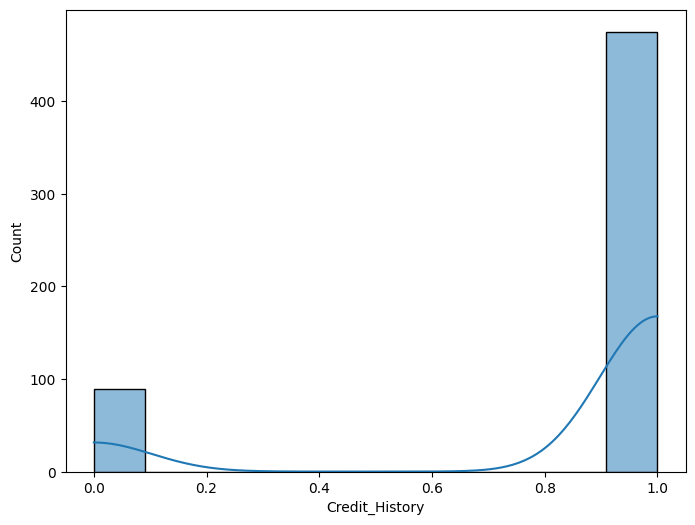

In [50]:
for col in numerical_train:
    plt.figure(figsize=(8,6))
    sns.histplot(train[col],kde=True)

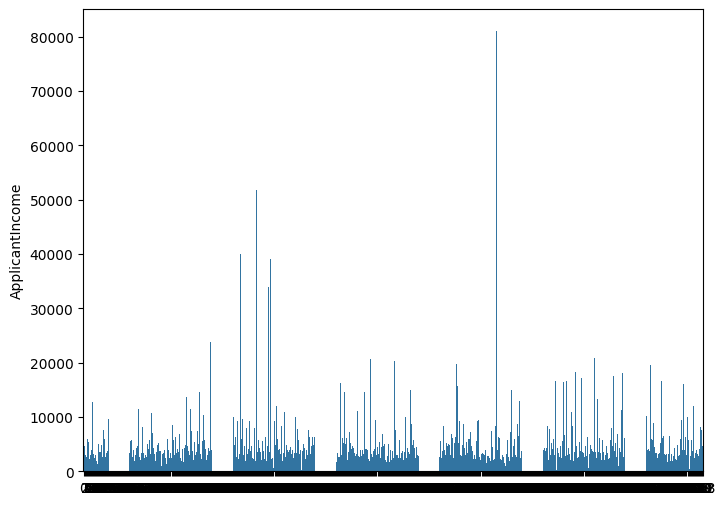

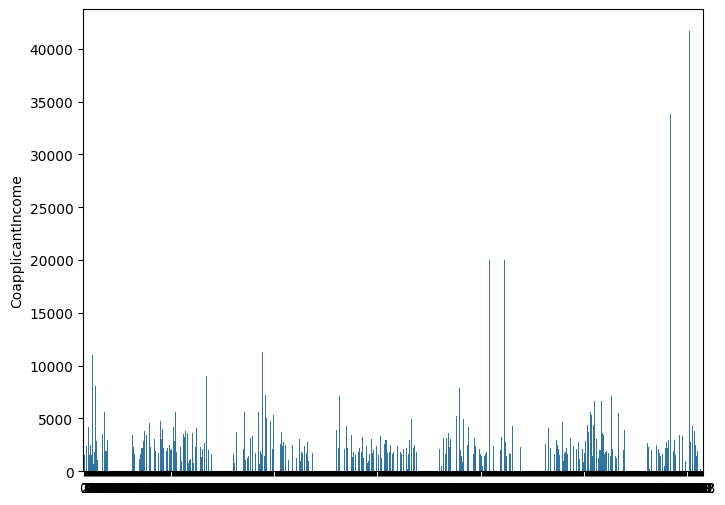

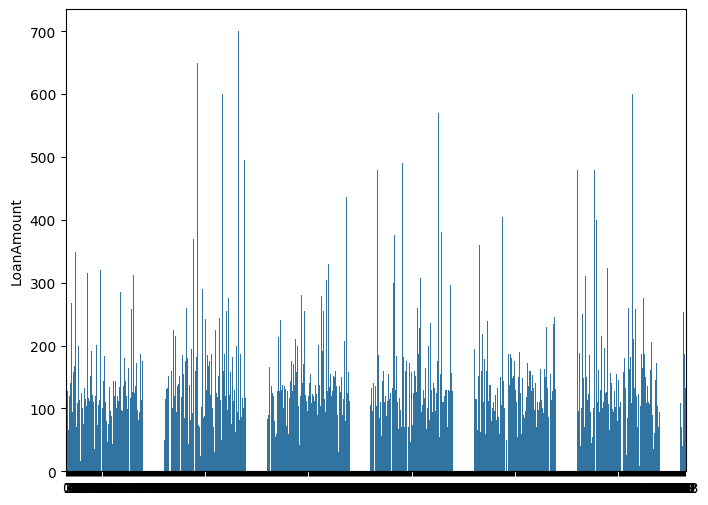

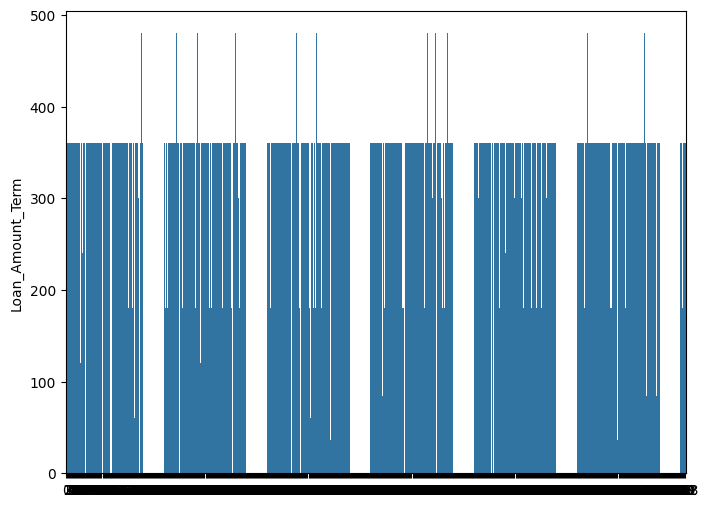

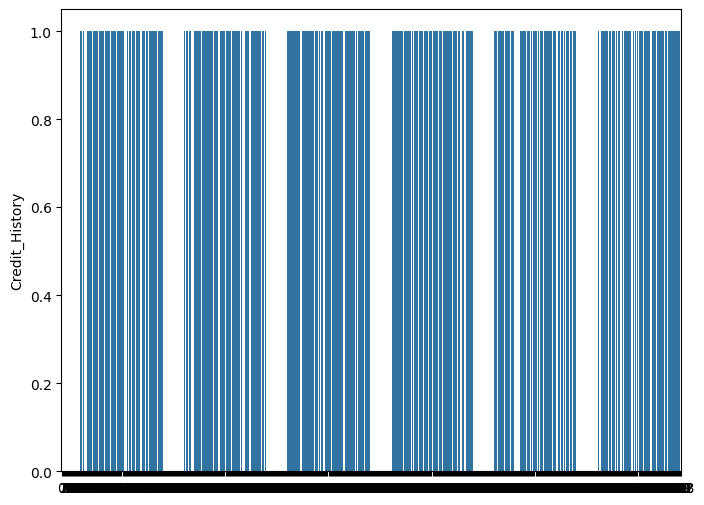

In [51]:
for col in numerical_train:
    plt.figure(figsize=(8,6))
    sns.barplot(train[col])

# Data Cleaning And Preprocessing

In [52]:
for col in numerical_train:
    train[col] = train[col].fillna(train[col].median())
for col in numerical_test:
    test[col] = test[col].fillna(test[col].median())

In [53]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [54]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [55]:
for col in categorical_train:
    train[col] = train[col].fillna(train[col].mode()[0])
for col in categorical_test:
    test[col] = test[col].fillna(train[col].mode()[0])

In [56]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [57]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [58]:
summary_train = pd.DataFrame({
    'Data Type': train.dtypes,
    'Unique Values': train.nunique()
})

summary_train

,Data Type,Unique Values
Gender,object,2
Married,object,2
Dependents,object,4
Education,object,2
Self_Employed,object,2
ApplicantIncome,int64,505
CoapplicantIncome,float64,287
LoanAmount,float64,203
Loan_Amount_Term,float64,10
Credit_History,float64,2


In [59]:
summary_test = pd.DataFrame({
    'Data Type': train.dtypes,
    'Unique Values': train.nunique()
})

summary_test

,Data Type,Unique Values
Gender,object,2
Married,object,2
Dependents,object,4
Education,object,2
Self_Employed,object,2
ApplicantIncome,int64,505
CoapplicantIncome,float64,287
LoanAmount,float64,203
Loan_Amount_Term,float64,10
Credit_History,float64,2


In [60]:
le = LabelEncoder()

In [61]:
encoders = {}

for col in categorical_test:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    encoders[col] = le

# now transform test using the same encoders
for col in categorical_test:
    test[col] = encoders[col].transform(test[col])

In [62]:
summary_train = pd.DataFrame({
    'Data Type': train.dtypes,
    'Unique Values': train.nunique()
})

summary_train

,Data Type,Unique Values
Gender,int64,2
Married,int64,2
Dependents,int64,4
Education,int64,2
Self_Employed,int64,2
ApplicantIncome,int64,505
CoapplicantIncome,float64,287
LoanAmount,float64,203
Loan_Amount_Term,float64,10
Credit_History,float64,2


In [63]:
summary_train = pd.DataFrame({
    'Data Type': train.dtypes,
    'Unique Values': train.nunique()
})

summary_train

,Data Type,Unique Values
Gender,int64,2
Married,int64,2
Dependents,int64,4
Education,int64,2
Self_Employed,int64,2
ApplicantIncome,int64,505
CoapplicantIncome,float64,287
LoanAmount,float64,203
Loan_Amount_Term,float64,10
Credit_History,float64,2


# Split Data

In [64]:
X = train.drop("Loan_Status", axis=1)
train["Loan_Status"] = train["Loan_Status"].map({"N": 0, "Y": 1})
y = train["Loan_Status"]

In [65]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test)

# Make Grid for Train Multiple Models and Select Best one

In [67]:


models = {
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "C": [0.1, 1, 10],
            "penalty": ["l2"]
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [None, 5, 10]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.05, 0.1]
        }
    },
    "DecisionTree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [None, 5, 10]
        }
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7]
        }
    },
    "NaiveBayes": {
        "model": GaussianNB(),
        "params": {}  # no params to tune
    }
}

# Make Report(DataFrame) of Result

In [68]:
results = []

for name, info in models.items():
    grid = GridSearchCV(
        estimator=info["model"],
        param_grid=info["params"],
        cv=5,
        scoring="f1",  # good for binary classification
        n_jobs=-1
    )
    
    # Use scaled features only for certain models
    if name in ["LogisticRegression", "SVM", "KNN"]:
        grid.fit(X_train_scaled, y_train)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_val_scaled)
        y_prob = best_model.predict_proba(X_val_scaled)[:,1]
    else:
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_val)
        y_prob = best_model.predict_proba(X_val)[:,1]
    
    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Accuracy": accuracy_score(y_val, y_pred),
        "F1-Score": f1_score(y_val, y_pred),
        "AUC": roc_auc_score(y_val, y_prob)
    })

In [69]:

results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
print(results_df)

                Model                                  Best Params  Accuracy  \
0  LogisticRegression                  {'C': 0.1, 'penalty': 'l2'}  0.861789   
1        RandomForest         {'max_depth': 5, 'n_estimators': 50}  0.853659   
4                 SVM               {'C': 0.1, 'kernel': 'linear'}  0.853659   
5                 KNN                           {'n_neighbors': 7}  0.845528   
6          NaiveBayes                                           {}  0.845528   
2    GradientBoosting  {'learning_rate': 0.05, 'n_estimators': 50}  0.837398   
3        DecisionTree                             {'max_depth': 5}  0.821138   

   F1-Score       AUC  
0  0.908108  0.801238  
1  0.903226  0.783282  
4  0.903226  0.809288  
5  0.897297  0.775851  
6  0.896175  0.764706  
2  0.893617  0.726006  
3  0.879121  0.725851  


In [70]:
best_model_info = results_df.iloc[0]  

print("Best Model:", best_model_info["Model"])
print("Best Params:", best_model_info["Best Params"])

Best Model: LogisticRegression
Best Params: {'C': 0.1, 'penalty': 'l2'}


In [71]:
fitted_grids = {}

for name, info in models.items():
    grid = GridSearchCV(
        estimator=info["model"],
        param_grid=info["params"],
        cv=5,
        scoring="f1",
        n_jobs=-1
    )
    
    if name in ["LogisticRegression", "SVM", "KNN"]:
        grid.fit(X_train_scaled, y_train)
    else:
        grid.fit(X_train, y_train)
    
    fitted_grids[name] = grid

# Select and Export Best Model

In [72]:
best_model_name = results_df.iloc[0]["Model"]
best_grid = fitted_grids[best_model_name]   
best_model = best_grid.best_estimator_

In [73]:


os.makedirs("models", exist_ok=True)

pipeline_data = {
    "model": best_model,
    "scaler": scaler,
    "encoders": encoders
}

joblib.dump(pipeline_data, "models/loan_model_pipeline.pkl")
print("Saved pipeline successfully ✅")


Saved pipeline successfully ✅
